In [43]:
import pandas as pd
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


In [5]:
sns.set_style("whitegrid")

In [6]:
df = pd.read_csv('Insurance claims data.csv')
df

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,POL019269,10.6,2.6,48,C5,34738,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58588,POL001254,2.3,2.2,37,C3,4076,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
58589,POL019859,6.6,2.2,35,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58590,POL014061,4.1,3.6,44,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

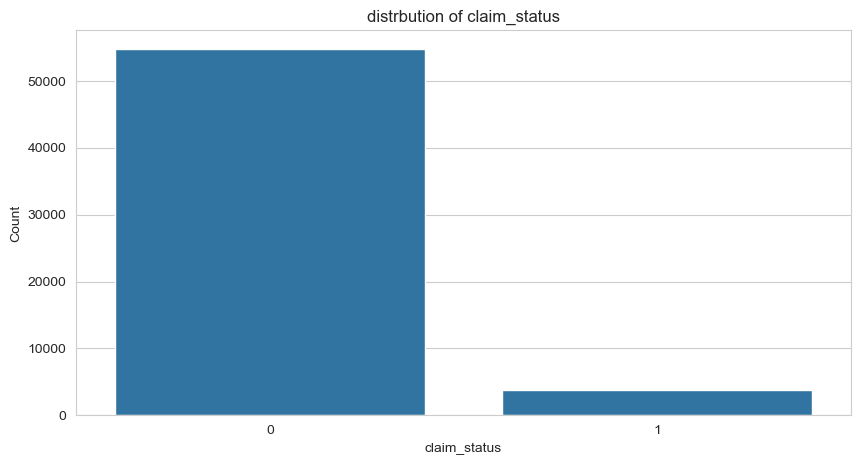

In [10]:
plt.figure(figsize = (10,5))
sns.countplot(data = df,x = 'claim_status')
plt.title('distrbution of claim_status')
plt.xlabel('claim_status')
plt.ylabel('Count')
plt.show()

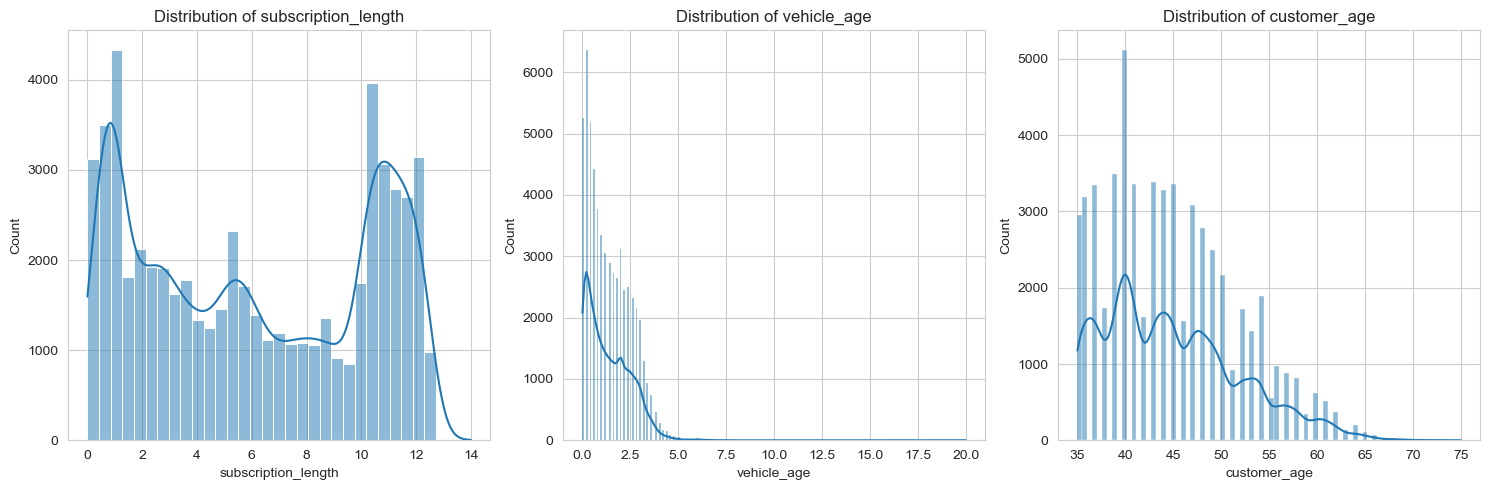

In [22]:
numerical_columns = ['subscription_length','vehicle_age','customer_age']
plt.figure(figsize=(15,5))

for i,column in enumerate(numerical_columns,1):
    plt.subplot(1,3,i)
    sns.histplot(df[column],kde = True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

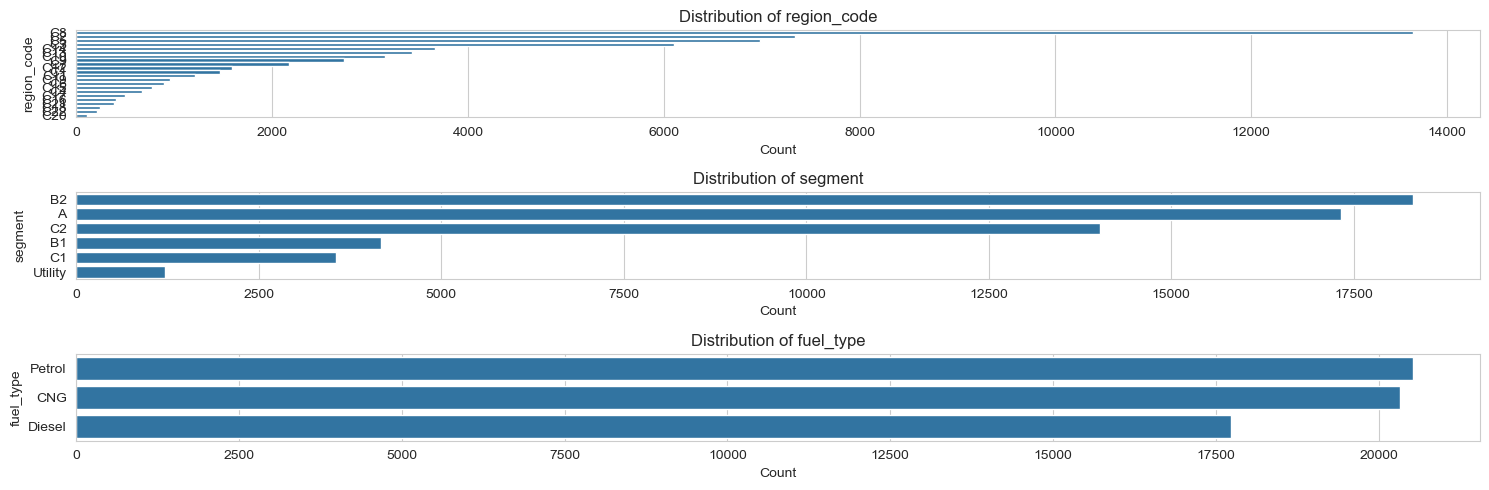

In [29]:
categorical_columns = ['region_code', 'segment', 'fuel_type']
plt.figure(figsize=(15,5))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)
    sns.countplot(y=column, data=df, order = df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [31]:
majority = df[df['claim_status'] == 0]
minority = df[df['claim_status'] == 1]

In [32]:
minority_oversampled = resample(minority,replace = True,n_samples = len(majority),random_state = 42)

In [34]:
oversample_data = pd.concat([majority,minority_oversampled])

In [35]:
oversample_distribution = oversample_data.claim_status.value_counts()

In [53]:
oversample_distribution

claim_status
0    54844
1    54844
Name: count, dtype: int64

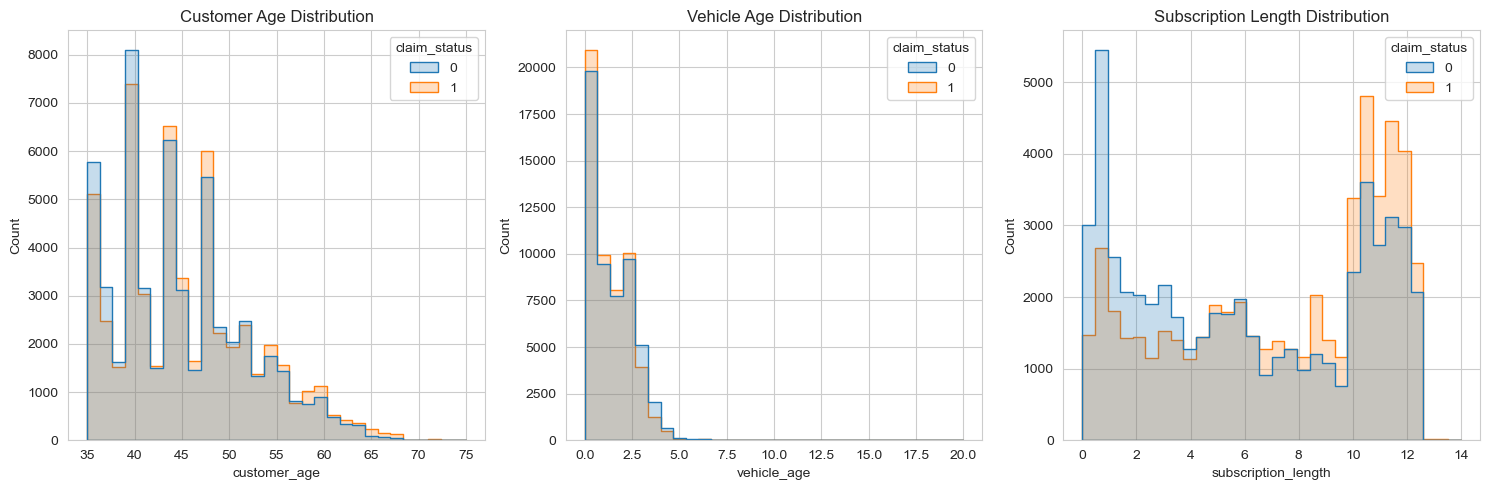

In [39]:
plt.figure(figsize = (15,5))

plt.subplot(1, 3, 1)
sns.histplot(data=oversample_data, x='customer_age', hue='claim_status', element='step', bins=30)
plt.title('Customer Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data=oversample_data, x='vehicle_age', hue='claim_status', element='step', bins=30)
plt.title('Vehicle Age Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data=oversample_data, x='subscription_length', hue='claim_status', element='step', bins=30)
plt.title('Subscription Length Distribution')

plt.tight_layout()
plt.show()

In [45]:
le = LabelEncoder()
encoded_data = df.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

X = encoded_data.drop('claim_status', axis=1)
y = encoded_data['claim_status']


In [46]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)


RandomForestClassifier(random_state=42)

In [47]:
feature_importance = rf_model.feature_importances_

features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df.head(10))

                Feature  Importance
0             policy_id    0.321072
1   subscription_length    0.248309
3          customer_age    0.176639
2           vehicle_age    0.135190
5        region_density    0.053838
4           region_code    0.052649
7                 model    0.000957
24               length    0.000846
26         gross_weight    0.000834
11          engine_type    0.000791


In [50]:
oversampled_data = oversample_data.drop('policy_id', axis=1)


X_oversampled = oversample_data.drop('claim_status', axis=1)
y_oversampled = oversample_data['claim_status']


In [51]:
X_oversampled_encoded = X_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

X_train, X_test, y_train, y_test = train_test_split(X_oversampled_encoded, y_oversampled, test_size=0.3, random_state=42)

In [52]:
rf_model_oversampled = RandomForestClassifier(random_state=42)
rf_model_oversampled.fit(X_train, y_train)

y_pred = rf_model_oversampled.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     16574
           1       0.98      1.00      0.99     16333

    accuracy                           0.99     32907
   macro avg       0.99      0.99      0.99     32907
weighted avg       0.99      0.99      0.99     32907

